<a href="https://colab.research.google.com/github/Snjkmr162/BLS_Chatbot_with_RL/blob/main/Chatbot_with_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Level 1

In [1]:
pip install requests pandas matplotlib

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

Defining BLS API details

In [37]:
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

SERIES_ID = "LNS14000000"  # Unemployment Rate (U-3)
START_YEAR = "2019"
END_YEAR = "2024"

Creating API request payload

In [38]:
payload = {
    "seriesid": [SERIES_ID],
    "startyear": START_YEAR,
    "endyear": END_YEAR
}

In [39]:
response = requests.post(BLS_API_URL, json=payload)

# Check request worked
print("Status Code:", response.status_code)

Status Code: 200


In [40]:
data = response.json()

# Inspect structure (important for learning)
print(data.keys())

dict_keys(['status', 'responseTime', 'message', 'Results'])


Extracting the time series data

In [41]:
series_data = data["Results"]["series"][0]["data"]

# Convert to DataFrame
df = pd.DataFrame(series_data)

df.head()

,year,period,periodName,value,footnotes
0,2024,M12,December,4.1,[{}]
1,2024,M11,November,4.2,[{}]
2,2024,M10,October,4.1,[{}]
3,2024,M09,September,4.1,[{}]
4,2024,M08,August,4.2,[{}]


Cleaning the data

In [42]:
df['value'] = df['value'].astype(float)

In [43]:
df["month"] = df["period"].str[1:].astype(int)

df["date"] = pd.to_datetime(
    df["year"] + "-" + df["month"].astype(str) + "-01"
)

In [44]:
df = df.sort_values("date").reset_index(drop=True)

df.head()

,year,period,periodName,value,footnotes,month,date
0,2019,M01,January,4.0,[{}],1,2019-01-01
1,2019,M02,February,3.8,[{}],2,2019-02-01
2,2019,M03,March,3.8,[{}],3,2019-03-01
3,2019,M04,April,3.7,[{}],4,2019-04-01
4,2019,M05,May,3.6,[{}],5,2019-05-01


In [45]:
df = df[["date", "value"]]
df.rename(columns={"value": "unemployment_rate"}, inplace=True)

df.tail()

,date,unemployment_rate
67,2024-08-01,4.2
68,2024-09-01,4.1
69,2024-10-01,4.1
70,2024-11-01,4.2
71,2024-12-01,4.1


Plotting the Unemployment trend

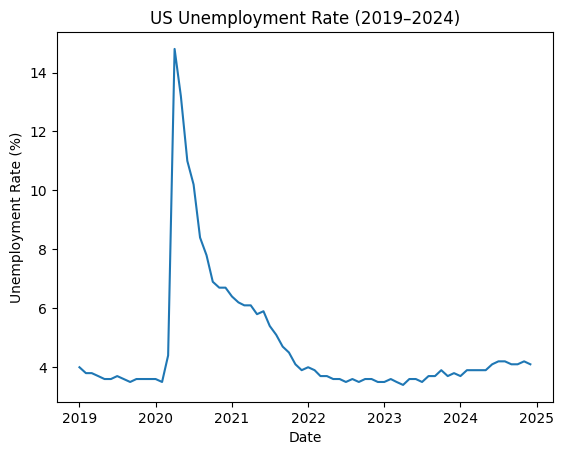

In [46]:
plt.figure()
plt.plot(df["date"], df["unemployment_rate"])
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("US Unemployment Rate (2019–2024)")
plt.show()

Summary Statistics

In [47]:
print("Average unemployment rate:", df["unemployment_rate"].mean())
print("Max unemployment rate:", df["unemployment_rate"].max())
print("Min unemployment rate:", df["unemployment_rate"].min())

Average unemployment rate: 4.737500000000001
Max unemployment rate: 14.8
Min unemployment rate: 3.4


In [48]:
last_12_months = df.tail(12)

last_12_months

,date,unemployment_rate
60,2024-01-01,3.7
61,2024-02-01,3.9
62,2024-03-01,3.9
63,2024-04-01,3.9
64,2024-05-01,3.9
65,2024-06-01,4.1
66,2024-07-01,4.2
67,2024-08-01,4.2
68,2024-09-01,4.1
69,2024-10-01,4.1


In [49]:
change = (
    last_12_months["unemployment_rate"].iloc[-1]
    - last_12_months["unemployment_rate"].iloc[0]
)

print("Change over last 12 months:", round(change, 2), "%")

Change over last 12 months: 0.4 %


From 2019 to early 2020, unemployment was relatively low.

In 2020, unemployment spiked sharply due to COVID-19 disruptions.

From 2021 onward, the labor market steadily recovered, with unemployment
gradually declining and stabilizing by 2024.

In [50]:
def fetch_unemployment_data(start_year, end_year):
    payload = {
        "seriesid": ["LNS14000000"],
        "startyear": start_year,
        "endyear": end_year
    }

    response = requests.post(BLS_API_URL, json=payload)
    data = response.json()

    series_data = data["Results"]["series"][0]["data"]
    df = pd.DataFrame(series_data)

    df["value"] = df["value"].astype(float)
    df["month"] = df["period"].str[1:].astype(int)

    df["date"] = pd.to_datetime(
        df["year"] + "-" + df["month"].astype(str) + "-01"
    )

    df = df.sort_values("date")
    df = df[["date", "value"]]
    df.rename(columns={"value": "unemployment_rate"}, inplace=True)

    return df

In [51]:
df = fetch_unemployment_data("2019", "2024")
df.head()

,date,unemployment_rate
71,2019-01-01,4.0
70,2019-02-01,3.8
69,2019-03-01,3.8
68,2019-04-01,3.7
67,2019-05-01,3.6
